# 5-MODUL. Machine Learning
Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.
Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# # Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>



In [4]:
df.district.value_counts()

district
Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df[df['price']=='Договорная'].shape

(99, 7)

In [7]:
df[df['size']=='Площадьземли:1сот'].shape

(1, 7)

In [8]:
import numpy as np
df['price'].replace('Договорная',np.nan,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13144\4181177974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace('Договорная',np.nan,inplace=True)


In [9]:
df['size'].replace('Площадьземли:1сот',100,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13144\1720137601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].replace('Площадьземли:1сот',100,inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7466 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [11]:
df['price']=df['price'].astype(float)
df['size']=df['size'].astype(float)

In [12]:
df['price'].isnull().value_counts()

price
False    7466
True       99
Name: count, dtype: int64

In [13]:
# NAN QIYMATLARNI ALOHIDA AJRATIB OLIB DATAFRAMEDAN O'CHIRIB TASHLADIK
df_missing_price = df[df['price'].isna()]
df = df.dropna(subset=['price'])

In [14]:
df['price'].value_counts().sort_index(ascending=False).head()

price
52000000.0    1
15504000.0    1
6630000.0     1
5568000.0     1
4240000.0     1
Name: count, dtype: int64

In [15]:
df = df[df['price'] < 10_000_000]

In [16]:
df['price'].value_counts().sort_index(ascending=True).head()

price
2.0       1
1000.0    2
1800.0    1
2000.0    2
2400.0    1
Name: count, dtype: int64

In [17]:
df = df[df['price'] >= 1000]

In [18]:
df['size'].isnull().value_counts()

size
False    7463
Name: count, dtype: int64

In [19]:
df.describe()

,rooms,size,level,max_levels,price
count,7463.000000,7463.000000,7463.000000,7463.000000,7.463000e+03
mean,2.622136,113.549087,3.693957,6.024119,6.231773e+04
std,1.083268,1501.358913,2.236997,2.607323,1.306154e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000e+03
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,6.630000e+06


In [20]:
df.iloc[1,0]

'город Ташкент, Яккасарайский район, 1-й тупик Шота Руставели'

In [21]:
df['kocha'] = df['location'].str.extract(r'район, (.+)')

In [22]:
df = df.drop(columns=['location'])

In [23]:
df.kocha.value_counts()#.head(700)

kocha
Чиланзар                    112
Кушбеги                     110
Нукус                        91
Буюк Ипак Йули               88
Бабура                       82
                           ... 
Улица феруза                  1
Ракат махалля                 1
м-в Феруза                    1
ГОСПИТАЛЬНЫЙ(банковская)      1
Базар Кадышева                1
Name: count, Length: 1502, dtype: int64

In [24]:
kocha_counts = df['kocha'].value_counts()
df['kocha_grouped'] = df['kocha'].replace(kocha_counts[kocha_counts <= 2].index, 'Other')
other_avg_price = df[df["kocha_grouped"] == "Other"]["price"].mean()
print(f'"Other" guruhidagi o‘rtacha narx: {other_avg_price}')

# "Other" guruhini 5 ta kichik guruhga bo‘lish
df.loc[df['kocha_grouped'] == 'Other', 'kocha_grouped'] = pd.qcut(
    df.loc[df['kocha_grouped'] == 'Other', 'price'],
    q=5, 
    labels=['other_very_low', 'other_low', 'other_medium', 'other_high', 'other_very_high']
)

print(df['kocha_grouped'].value_counts())  
print(df.groupby('kocha_grouped')['price'].mean()) 

"Other" guruhidagi o‘rtacha narx: 72697.96621078037
kocha_grouped
other_low                   257
other_high                  250
other_very_low              249
other_medium                244
other_very_high             243
                           ... 
3-й проезд Шуртепа            3
Хазинабог                     3
Хамза                         3
Феруза-2 Военный городок      3
Куйлюк 5-й квартал            3
Name: count, Length: 433, dtype: int64
kocha_grouped
1-й Акдарьинский проезд       73250.000000
1-й Нукусский проезд          90777.777778
1-й Паркентский проезд        59055.555556
1-й переулок Бойкургон        41500.000000
1-й проезд 3-й улицы Обод     34500.000000
                                 ...      
ц-1 Буюк ипак йули (Ц-1)     104473.684211
ц-2 Олой (Ц-2)                76666.666667
ц-4 Кашгар (Ц-4)             100868.750000
ц-5 Киёт (Ц-5)                95496.939394
ц-6 Минор (Ц-6)               69000.000000
Name: price, Length: 433, dtype: float64


In [25]:
df.kocha_grouped.value_counts()

kocha_grouped
other_low                   257
other_high                  250
other_very_low              249
other_medium                244
other_very_high             243
                           ... 
3-й проезд Шуртепа            3
Хазинабог                     3
Хамза                         3
Феруза-2 Военный городок      3
Куйлюк 5-й квартал            3
Name: count, Length: 433, dtype: int64

In [26]:
# "other_very_high" bo'lgan eng katta 20 ta qiymatni aniqlaymiz
top_20_other_high = df[df['kocha_grouped'] == 'other_very_high'].nlargest(20, 'price')

# Ushbu qiymatlarni asl "kocha" nomlari bilan almashtiramiz
df.loc[top_20_other_high.index, 'kocha_grouped'] = df.loc[top_20_other_high.index, 'kocha']

In [27]:
for category in ['other_low', 'other_very_low', 'other_high', 'other_medium', 'other_very_high']:
    avg_price = df[df['kocha_grouped'] == category]['price'].mean()
    min_price = df[df['kocha_grouped'] == category]['price'].min()
    max_price = df[df['kocha_grouped'] == category]['price'].max()
    
    print(f"{category}:")
    print(f"  O'rtacha narx: {avg_price}")
    print(f"  Eng kichik narx: {min_price}")
    print(f"  Eng katta narx: {max_price}")
    print("-" * 40)


other_low:
  O'rtacha narx: 35721.346303501945
  Eng kichik narx: 30554.0
  Eng katta narx: 40000.0
----------------------------------------
other_very_low:
  O'rtacha narx: 23905.409638554218
  Eng kichik narx: 2000.0
  Eng katta narx: 30500.0
----------------------------------------
other_high:
  O'rtacha narx: 62797.496
  Eng kichik narx: 52148.0
  Eng katta narx: 75000.0
----------------------------------------
other_medium:
  O'rtacha narx: 45590.934426229505
  Eng kichik narx: 40100.0
  Eng katta narx: 52000.0
----------------------------------------
other_very_high:
  O'rtacha narx: 116108.41704035875
  Eng kichik narx: 75500.0
  Eng katta narx: 280000.0
----------------------------------------


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

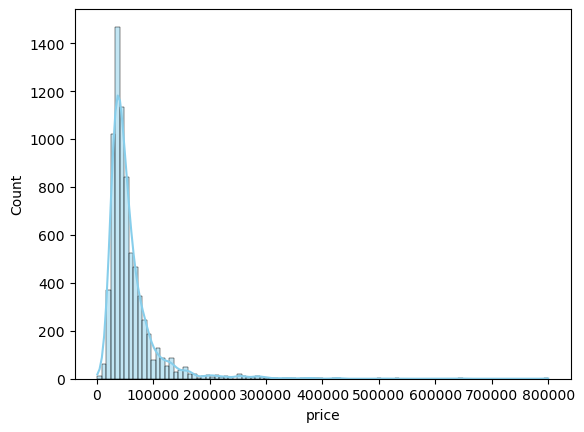

In [29]:
sns.histplot(df[df['price']<1000000], x='price', bins=100, kde=True, color='skyblue')
plt.show()


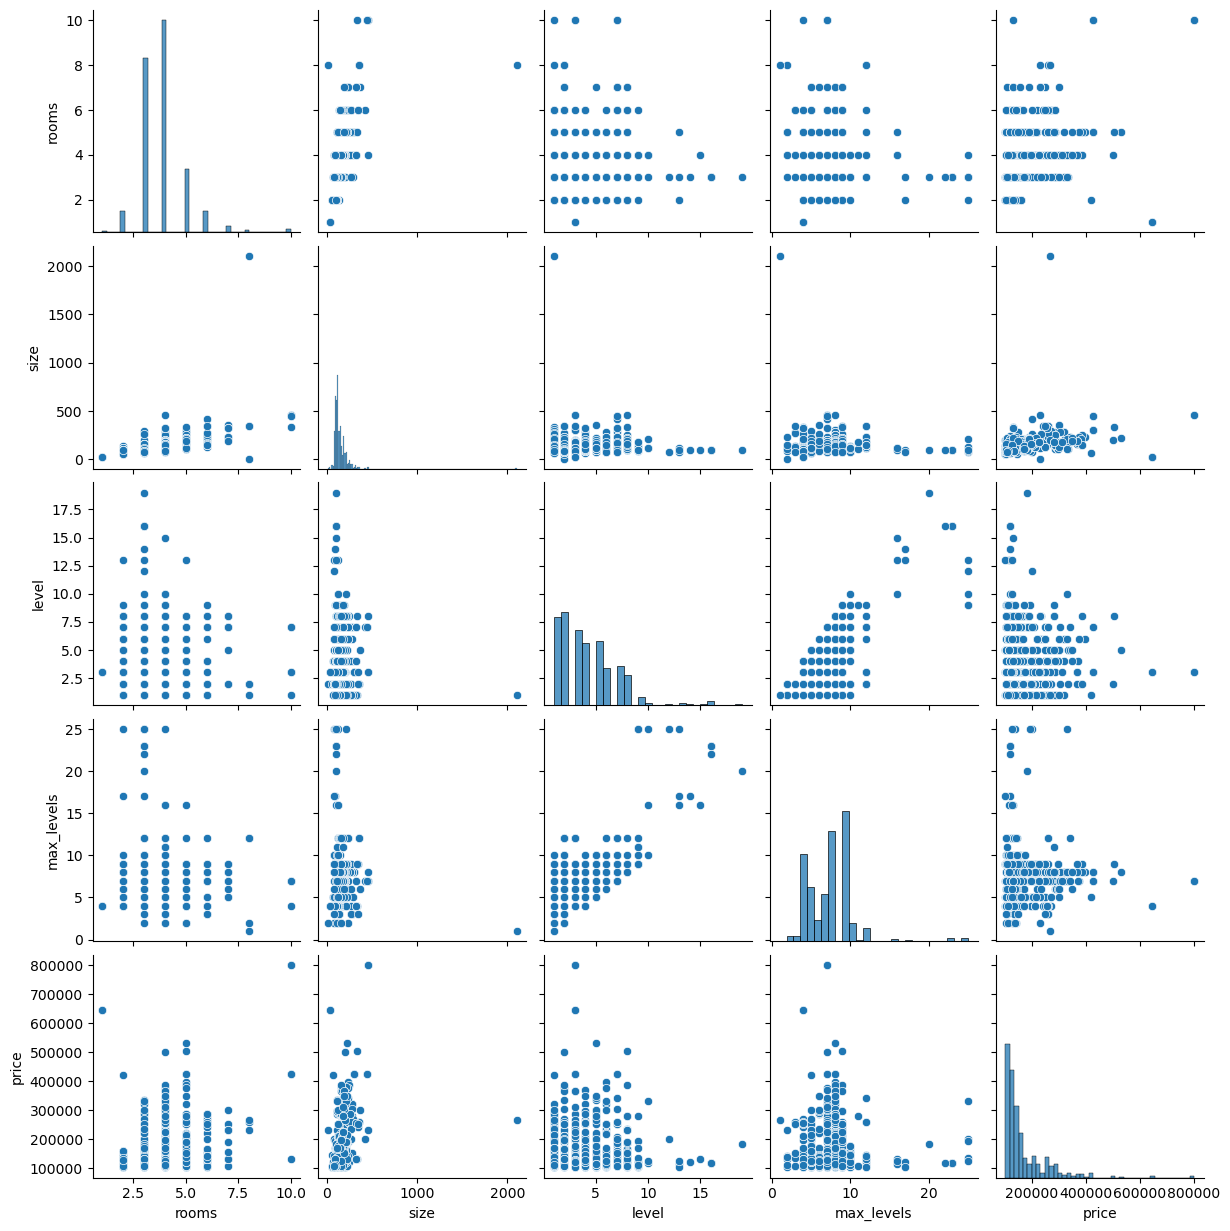

In [30]:
sns.pairplot(df[(df['price'] > 100_000) & (df['price'] < 1_000_000)])
plt.show()

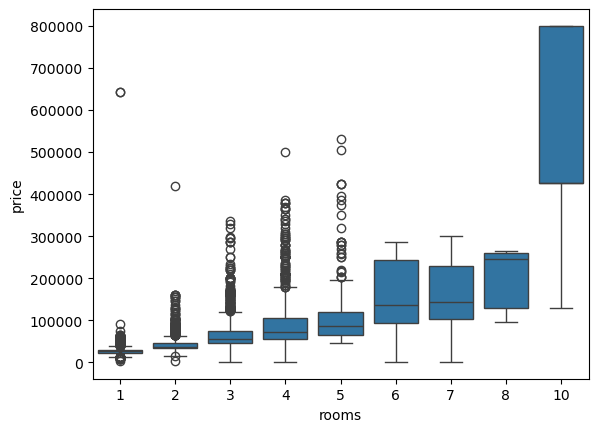

In [31]:
sns.boxplot(x=df['rooms'][df['price']<1000000], y=df['price'][df['price']<1000000])
plt.show()

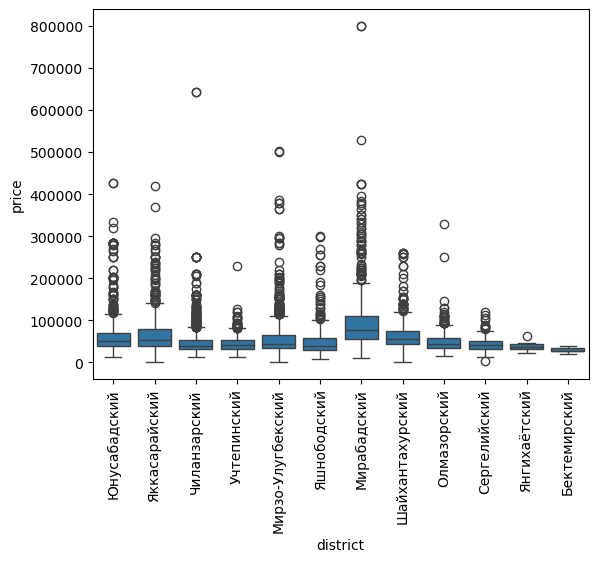

In [32]:
sns.boxplot(x=df['district'][df['price']<1000000], y=df['price'][df['price']<1000000])
plt.xticks(rotation=90)
plt.show()

In [33]:
df = df.drop(columns=['kocha'])

In [34]:
df['kocha_grouped'].nunique()

452

In [35]:
df

,district,rooms,size,level,max_levels,price,kocha_grouped
0,Юнусабадский,3,57.0,4,4,52000.0,Юнусабад 8-й квартал
1,Яккасарайский,2,52.0,4,5,56000.0,other_high
2,Чиланзарский,2,42.0,4,4,37000.0,Чиланзар 2-й квартал
3,Чиланзарский,3,65.0,1,4,49500.0,Чиланзар 9-й квартал
4,Чиланзарский,3,70.0,3,5,55000.0,площадь Актепа
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0,Городок Авиастроителей 2-й квартал
7561,Яшнободский,2,49.0,1,4,32000.0,1-й проезд Авиасозлар
7562,Шайхантахурский,2,64.0,3,9,40000.0,Зульфияханум
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0,Буюк Ипак Йули


In [6]:
df

,rooms,size,level,max_levels,price,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский,kocha_target_encoded,log_price
0,3,57.0,4,4,52000.0,False,False,False,False,False,False,False,True,False,False,False,56256.818922,10.859018
1,2,52.0,4,5,56000.0,False,False,False,False,False,False,False,False,True,False,False,62779.043431,10.933125
2,2,42.0,4,4,37000.0,False,False,False,False,False,True,False,False,False,False,False,40245.196500,10.518700
3,3,65.0,1,4,49500.0,False,False,False,False,False,True,False,False,False,False,False,48123.939822,10.809748
4,3,70.0,3,5,55000.0,False,False,False,False,False,True,False,False,False,False,False,59845.152798,10.915107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,1,38.0,5,5,24500.0,False,False,False,False,False,False,False,False,False,False,True,55678.486132,10.106469
7561,2,49.0,1,4,32000.0,False,False,False,False,False,False,False,False,False,False,True,43553.178832,10.373522
7562,2,64.0,3,9,40000.0,False,False,False,False,False,False,True,False,False,False,False,58476.949427,10.596660
7563,1,18.0,1,4,11000.0,False,True,False,False,False,False,False,False,False,False,False,79047.686653,9.305741


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder=OrdinalEncoder()
kocha_grouped_encoded=

In [2]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# import xgboost as xgb
# import warnings
# warnings.filterwarnings("ignore")

# # 1. Ma'lumotlarni yuklash va dastlabki tozalash
# df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
# print("Birinchi 5 qator:")
# print(df.head())

# # 2. Keraksiz belgilarni almashtirish va ustunlarni mos turga o'tkazish
# df['price'].replace('Договорная', np.nan, inplace=True)
# df['size'].replace('Площадьземли:1сот', 100, inplace=True)
# df['price'] = df['price'].astype(float)
# df['size'] = df['size'].astype(float)

# # 3. NAN qiymatlarni ajratib olib, so'ng olib tashlaymiz va narx diapazonini belgilaymiz
# df_missing_price = df[df['price'].isna()]
# df = df.dropna(subset=['price'])
# df = df[(df['price'] < 10_000_000) & (df['price'] >= 1000)]

# # 4. "kocha" ustunini hosil qilish: location ustunidan "район, " dan keyingi qismni ajratamiz
# df['kocha'] = df['location'].str.extract(r'район, (.+)')
# df = df.drop(columns=['location'])

# # 5. "kocha" ustunida kam uchraydigan (2 marta yoki kam) qiymatlarni "Other" ga almashtiramiz
# kocha_counts = df['kocha'].value_counts()
# df['kocha_grouped'] = df['kocha'].replace(kocha_counts[kocha_counts <= 2].index, 'Other')

# # Tekshirib ko'ramiz: "Other" guruhining o'rtacha narxi
# other_avg_price = df.loc[df["kocha_grouped"] == "Other", "price"].mean()
# print(f'"Other" guruhidagi o‘rtacha narx: {other_avg_price}')

# # 6. "Other" guruhini narx bo'yicha 5 teng segmentga bo'lamiz
# df.loc[df['kocha_grouped'] == 'Other', 'kocha_grouped'] = pd.qcut(
#     df.loc[df['kocha_grouped'] == 'Other', 'price'],
#     q=5, 
#     labels=['other_very_low', 'other_low', 'other_medium', 'other_high', 'other_very_high']
# )

# print("\nGuruhlar bo‘yicha taqsimot:")
# print(df['kocha_grouped'].value_counts())
# print("\nHar bir guruhning o‘rtacha narxi:")
# print(df.groupby('kocha_grouped')['price'].mean())

# # 7. "other_very_high" guruhidagi eng katta 20 ta qiymatni asl "kocha" nomlari bilan almashtiramiz
# top_20_other_high = df[df['kocha_grouped'] == 'other_very_high'].nlargest(20, 'price')
# df.loc[top_20_other_high.index, 'kocha_grouped'] = df.loc[top_20_other_high.index, 'kocha']

# # 8. Endi original "kocha" ustunini olib tashlaymiz
# df = df.drop(columns=['kocha'])

# # 9. "district" ustunini One-Hot Encoding orqali kodlaymiz
# df = pd.get_dummies(df, columns=['district'], drop_first=True)

# # 10. Target Encoding with Smoothing: "kocha_grouped" ustunini narx asosida kodlaymiz
# global_mean = df['price'].mean()
# k = 10  # Smoothing parameter (tajriba asosida sozlanadi)

# agg = df.groupby('kocha_grouped')['price'].agg(['mean', 'count']).rename(columns={'mean':'cat_mean', 'count':'n'})
# agg['encoded'] = (agg['cat_mean'] * agg['n'] + global_mean * k) / (agg['n'] + k)
# df['kocha_target_encoded'] = df['kocha_grouped'].map(agg['encoded'])
# df = df.drop(columns=['kocha_grouped'])

# # 11. Log-transformatsiya: narx diapazonini qisqartirish uchun
# df['log_price'] = np.log1p(df['price'])

# # 12. Model uchun xususiyatlar va target ustunini aniqlaymiz
# # Raqamli ustunlar: rooms, size, level, max_levels, kocha_target_encoded va one-hot encoded district ustunlari
# features = ['rooms', 'size', 'level', 'max_levels', 'kocha_target_encoded']
# district_cols = [col for col in df.columns if col.startswith("district_")]
# features.extend(district_cols)
# X = df[features]
# y = df['log_price']

# print("\nModelda ishlatilayotgan xususiyatlar:")
# print(X.columns.tolist())

# # 13. Raqamli ustunlarni skalalash (StandardScaler)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 14. Tren-test to'plamlariga ajratish (80% tren, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # 15. XGBoost modelini quramiz va GridSearchCV yordamida tuning qilamiz
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 1.0]
# }

# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("\nEng yaxshi parametrlar:")
# print(grid_search.best_params_)

# best_model = grid_search.best_estimator_

# # 16. Test to'plamida bashorat qilish
# y_pred = best_model.predict(X_test)

# # Log narxdan asl narxga o'tkazish: asl narx = exp(log_price) - 1
# y_pred_actual = np.expm1(y_pred)
# y_test_actual = np.expm1(y_test)

# mse = mean_squared_error(y_test_actual, y_pred_actual)
# r2 = r2_score(y_test_actual, y_pred_actual)

# print("\nModel baholash:")
# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)


Birinchi 5 qator:
                                            location       district  rooms  \
0  город Ташкент, Юнусабадский район, Юнусабад 8-...   Юнусабадский      3   
1  город Ташкент, Яккасарайский район, 1-й тупик ...  Яккасарайский      2   
2  город Ташкент, Чиланзарский район, Чиланзар 2-...   Чиланзарский      2   
3  город Ташкент, Чиланзарский район, Чиланзар 9-...   Чиланзарский      3   
4  город Ташкент, Чиланзарский район, площадь Актепа   Чиланзарский      3   

  size  level  max_levels  price  
0   57      4           4  52000  
1   52      4           5  56000  
2   42      4           4  37000  
3   65      1           4  49500  
4   70      3           5  55000  
"Other" guruhidagi o‘rtacha narx: 72697.96621078037

Guruhlar bo‘yicha taqsimot:
kocha_grouped
other_low                   257
other_high                  250
other_very_low              249
other_medium                244
other_very_high             243
                           ... 
3-й проезд Шурте